<a href="https://colab.research.google.com/github/EmoreiraV/RUoG/blob/main/Week_5_Live_Session_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5 Live Session

**Mid-term Break**

Next week will be the mid-term break for semester 1. There will be no new material released and no live session next week (though week 6 is available for you to view).

I will keep monitoring the forums etc. if you do have any questions.

Reminder - Programming Quiz 1 is due Friday at 5pm.

# Week 5 Materials

In week 5, we will look at how to create various plots using the base plotting functions in R. We will look at:



*   The `plot()` function
*   High-level functions for statistical plots
*   Legends and low-level plotting functions
*   3D and image plots
*   Setting plot preferences
*   Exporting plots



# The `plot()` function

The `plot()` function is the key function for R's built-in graphics. We can use `plot()` to create two-dimensional plots.

We can specify the vectors `x` and `y` to create the plot in several ways, specifying a matrix or list also

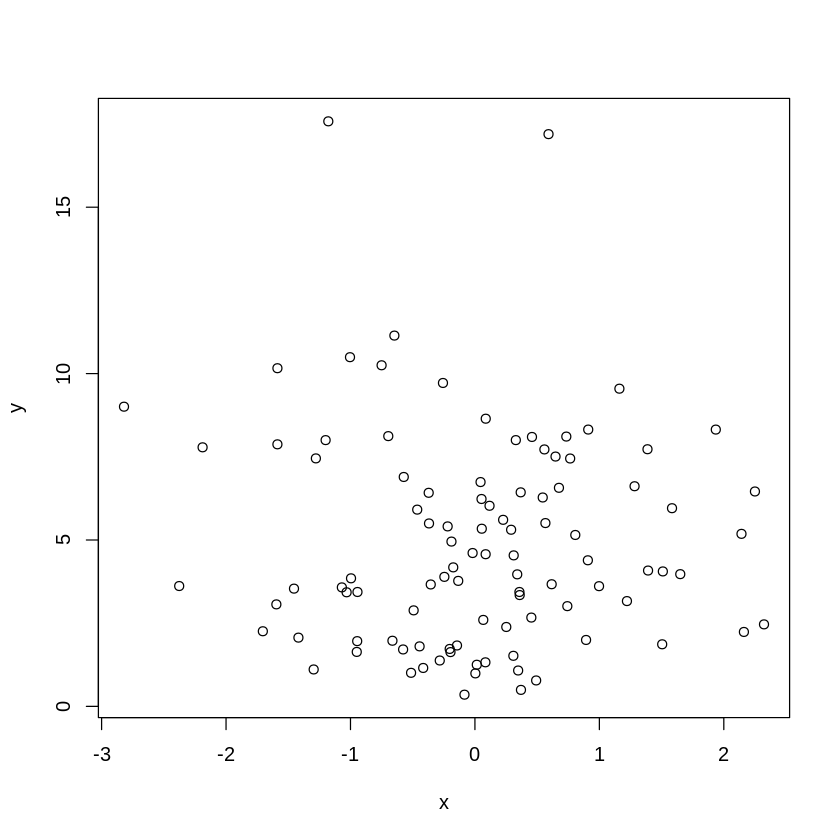

In [ ]:
n <- 100
x <- rnorm(n)
y <- rchisq(n,5)

plot(x,y)

The `plot()` function has a lot of optional arguments to customise your plot. Some key arguments are:



*   `type` controls how we plot the data (e.g. `p` produces points, `l` for a line through the data).
*   `main` controls the title of the plot.
*   `col` controls the colour of the plotting symbols



,Country,Region,Year,Population,LifeExpectancy,HealthExpenditure
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,Albania,Europe & Central Asia,2010,3204284,76.90095,220.2286
2,Algeria,Middle East & North Africa,2010,35468208,72.85254,198.1556
3,Angola,Sub-Saharan Africa,2010,19081912,50.65366,146.1099
4,Argentina,Latin America & Caribbean,2010,40412376,75.63215,759.2994
5,Armenia,Europe & Central Asia,2010,3092072,73.78356,133.7856
6,Australia,East Asia & Pacific,2010,22065300,81.69512,5173.5024


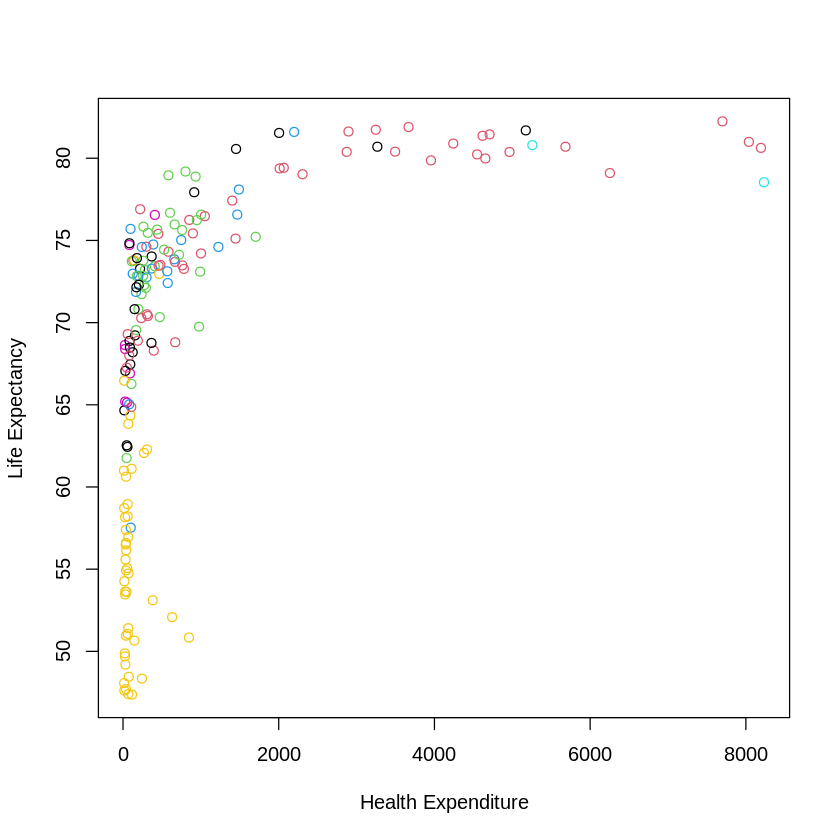

In [ ]:
load(url("https://github.com/UofGAnalyticsData/R/raw/main/Week%205/w5.RData"))
head(health)

plot(LifeExpectancy~HealthExpenditure,data=health, col=Region, xlab="Health Expenditure", ylab="Life Expectancy")


Many objects in R have a set `plot` method (such as fitting a regression) which will produce a set of plots specific to the operation being carried out (you will see more of this in courses later in the programme.

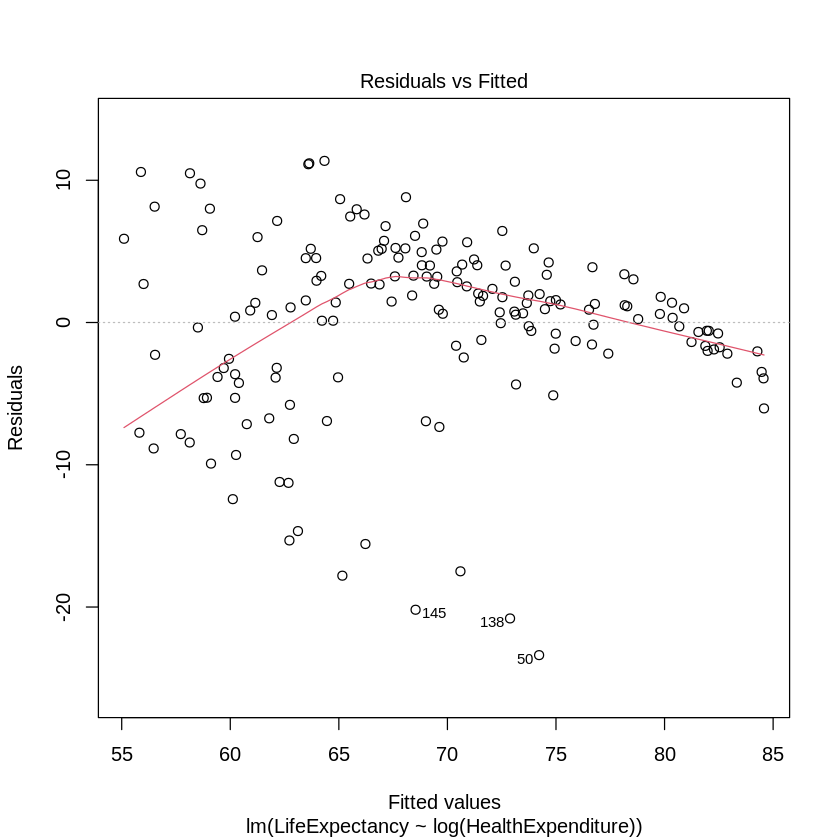

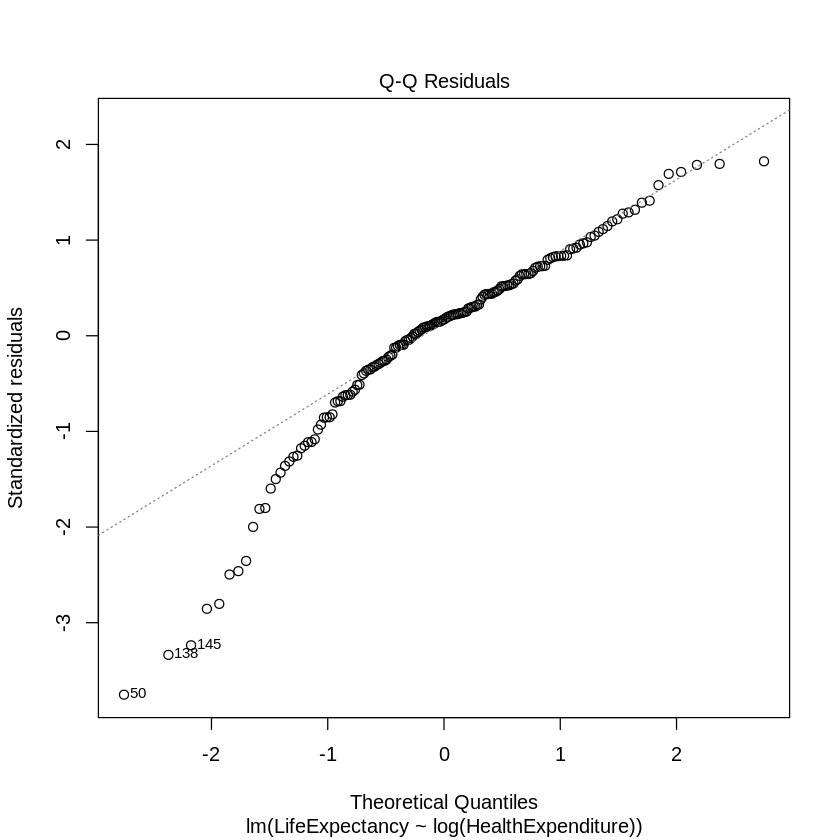

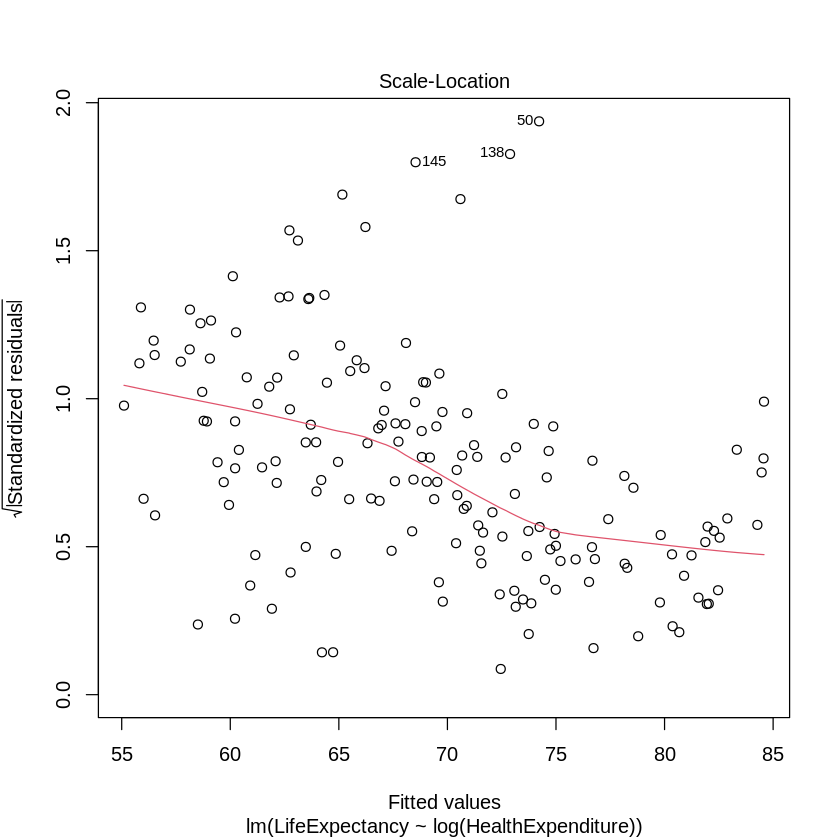

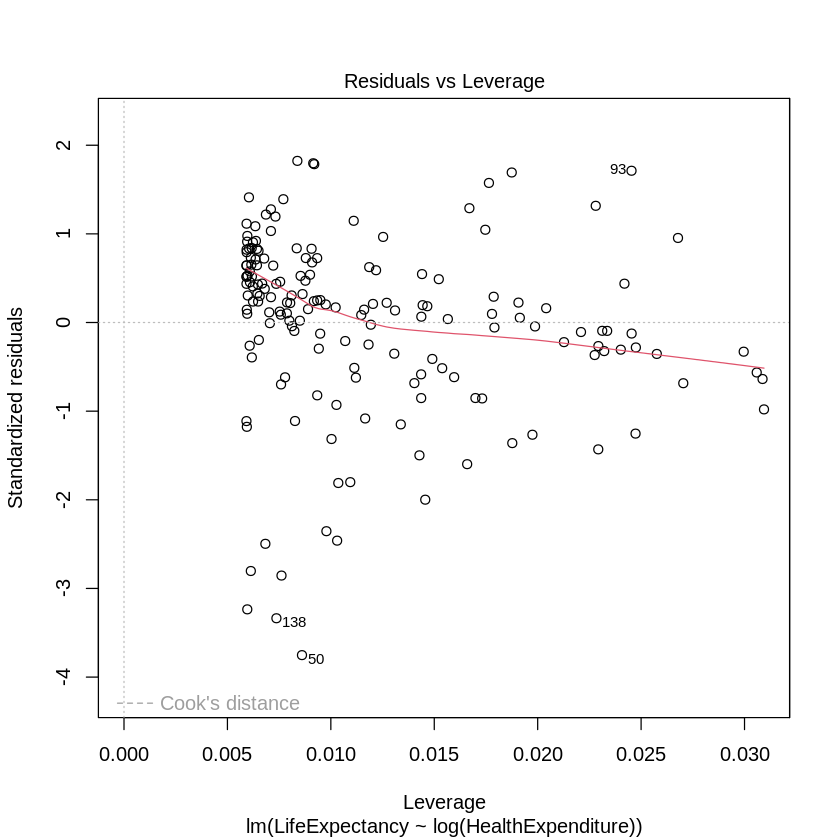

In [ ]:
model <- lm(LifeExpectancy~ log(HealthExpenditure), data=health)
plot(model)

# High-level functions for statistical plots

The `barplot` function can be used to create a bar plot

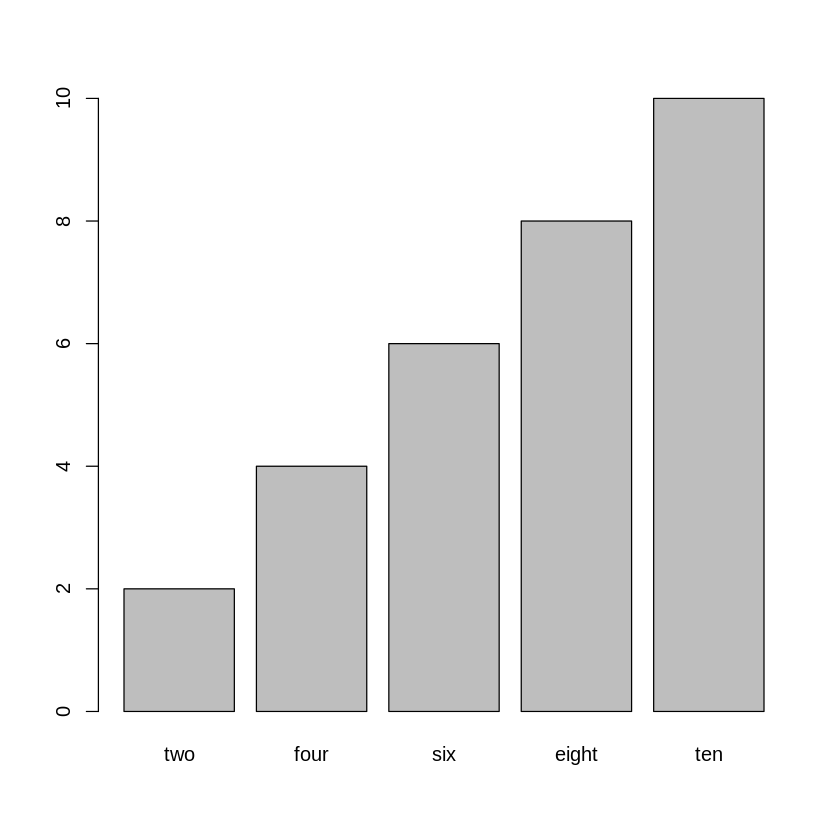

In [ ]:
numbers <- c(2,4,6,8,10)
names(numbers) <- c("two","four","six","eight","ten")
barplot(numbers)

Box plots can be created by using the function `boxplot`. The `boxplot` command can produce a box plot for a vector `y`, though we can split this by categories `x` as well if needed.

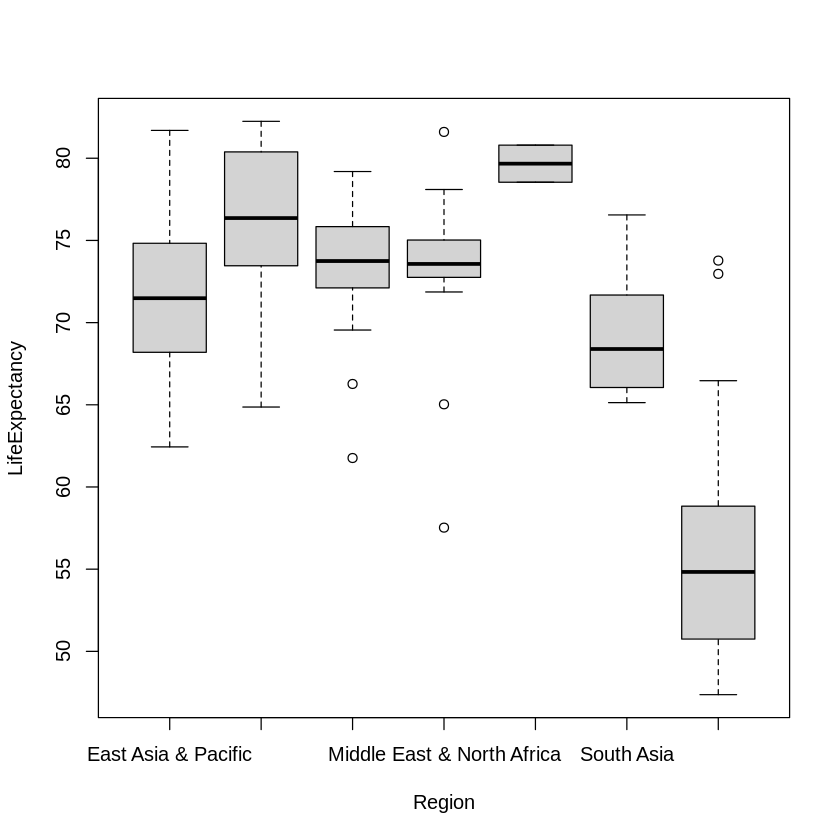

In [ ]:
boxplot(LifeExpectancy ~Region, data=health)

A histogram can be created by using the function `hist`.

We can also create a density plot using `density`

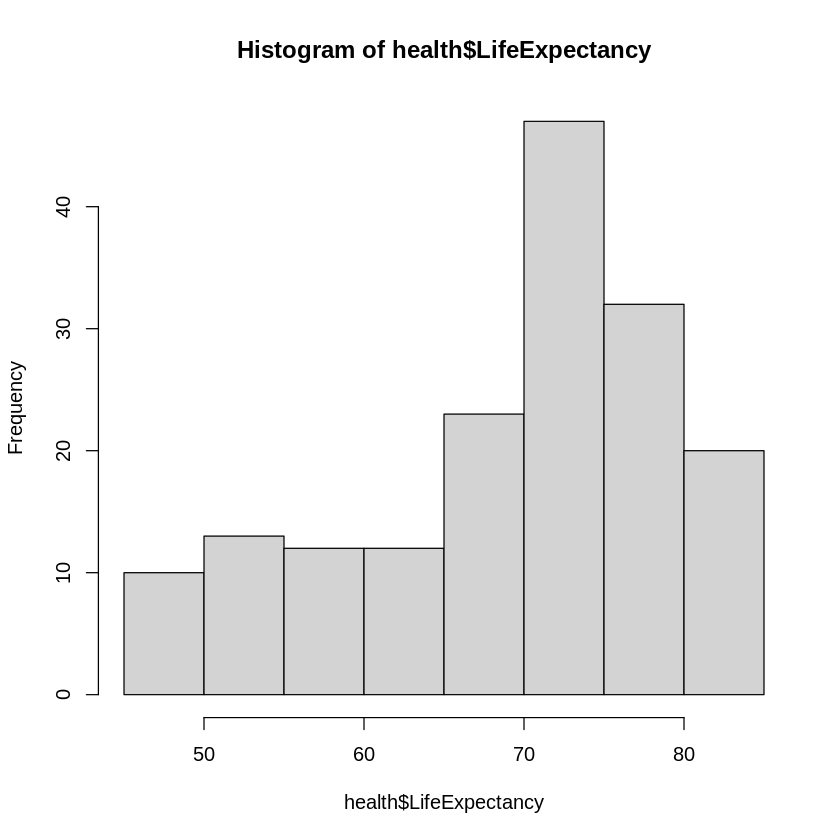

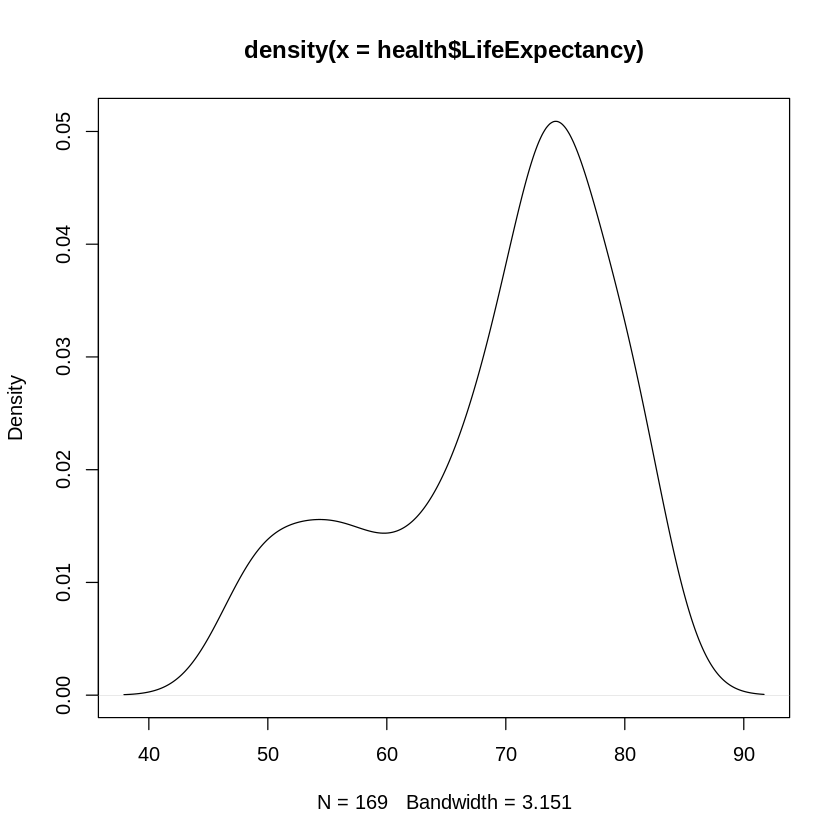

In [ ]:
hist(health$LifeExpectancy)
plot(density(health$LifeExpectancy))

If we have data with quite a few columns, we can use the `pairs` function to draw a matrix of scatterplots.

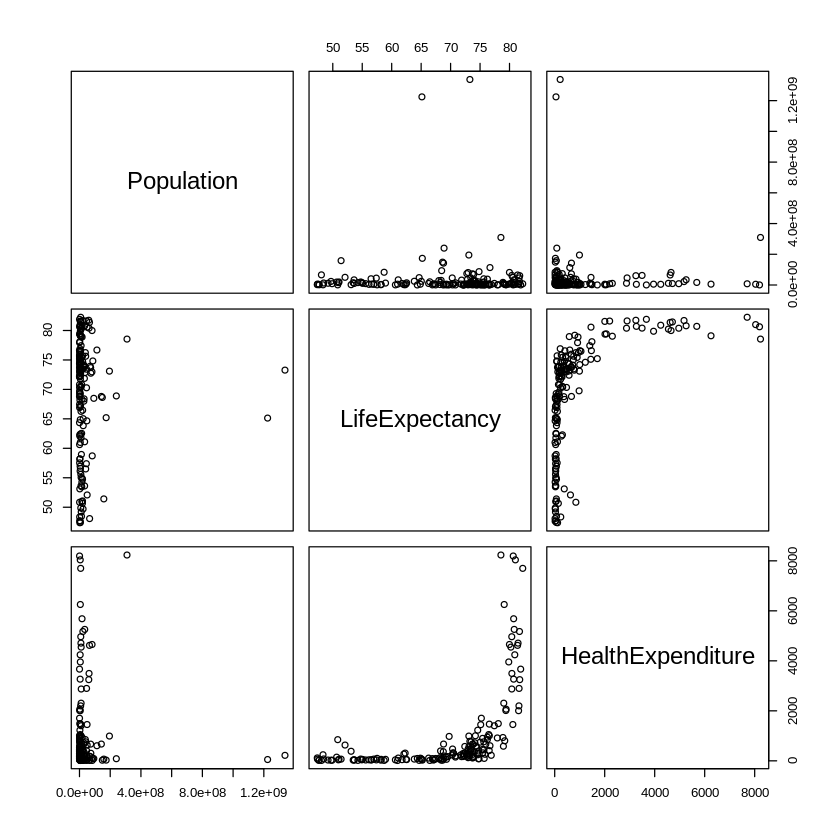

In [ ]:
pairs(health[,4:6])

# Legends

When we plot by categories like we did earlier, we can use the `legend` function to add a legend to a plot.

We can specify the position of the legend by using `position`, which can be location specific or use coordinates.

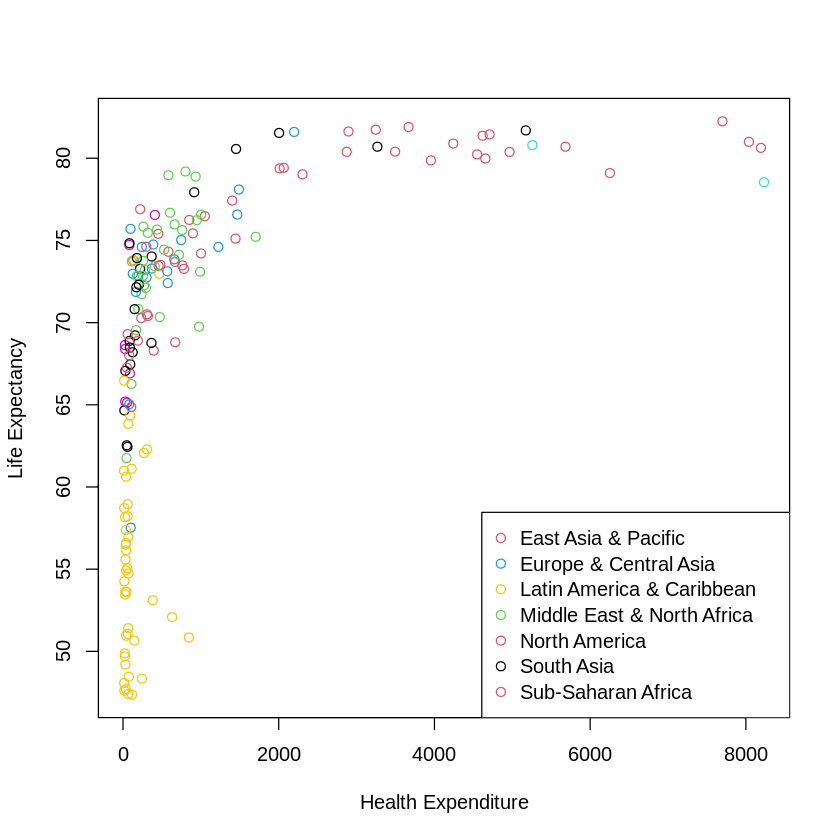

In [ ]:
plot(LifeExpectancy~HealthExpenditure,data=health, col=Region, xlab="Health Expenditure", ylab="Life Expectancy")
legend("bottomright", pch=1,col=(health$Region), legend=levels(health$Region))

# Low-level plotting functions

We can add `lines` and `points` to plots that have already been rendered. This will superimpose these objects onto the existing plot. We can use these commands in the same way we have used `plot`.

We can also add text labels to a plot based on a character string from the data

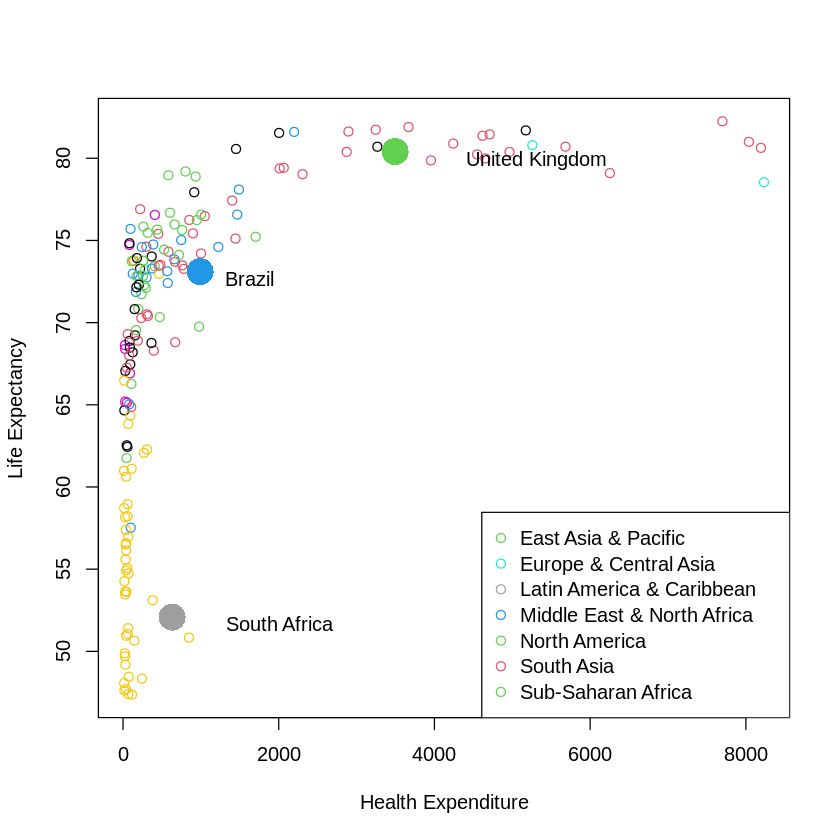

In [ ]:
plot(LifeExpectancy~HealthExpenditure,data=health, col=Region, xlab="Health Expenditure", ylab="Life Expectancy")
legend("bottomright", pch=1,col=1+unclass(health$Region), legend=levels(health$Region))

library(tidyverse)
library(magrittr)

health2 <- health %>%
  filter(Country %in% c("United Kingdom", "South Africa", "Brazil"))

health2 %$% points(HealthExpenditure, LifeExpectancy, col=1+unclass(Region), pch=16, cex=3)
health2 %$% text(HealthExpenditure, LifeExpectancy, Country, adj=c(-0.5,1))

# 3-D plots

We can create 3-d plots of data using base R plotting commands (though they can be difficult to interpret!). These can be useful for visualising functions of data.

# Mathematical notation in plots

We can also add in mathematical notation in plots, similar to LaTeX style mathematical writing.

# Setting Plot Preferences

The `par` function can be used to customise plot layouts in several ways. One of the key uses is to put more than one plot in a figure.

We can be more specific with our layouts using the `layout` command

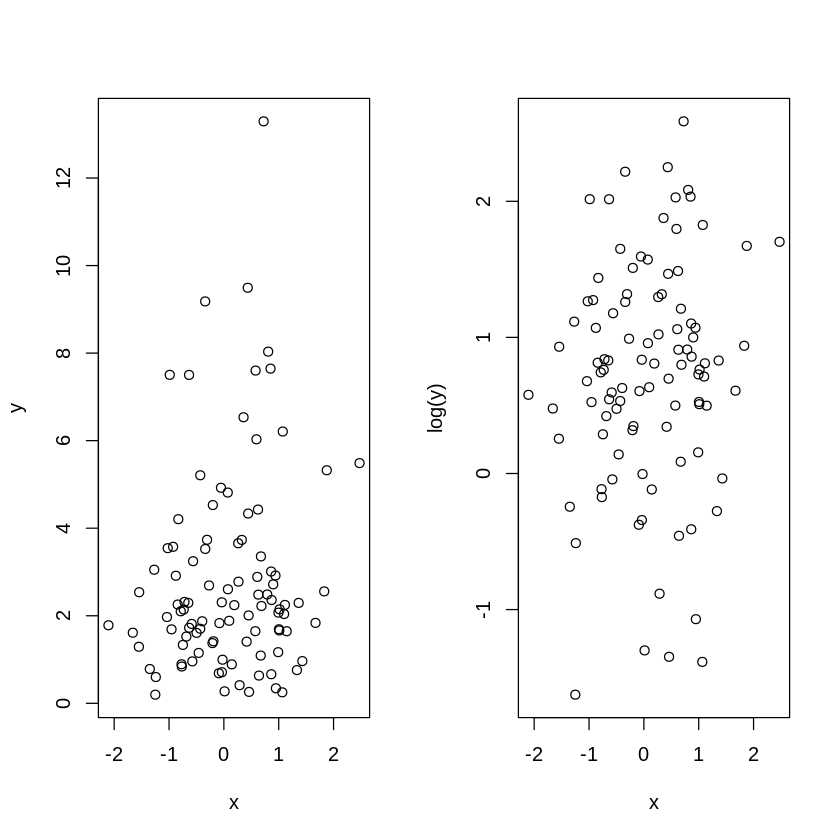

In [ ]:
x <- rnorm(100)
y <- rchisq(100,3)

par(mfrow=c(1,2))
plot(x,y)
plot(x, log(y))

# Exporting Plots

R will use the screen as a plotting device. You can simply copy across the plot to your clipboard if you wish to export into a document.

You can also save your plot as various objects such as pdf and svg files too.

# Week 5 Review Task

The package MASS contains a data frame called hills, which we will use in this task. It contains the recorded times (in 1984) for 35 Scottish hill races. It has three columns, though we will only use the following two:


*   dist - Distance of the race (in miles)
*   time - Record time (in minutes)

a) Create a scatter plot of time against dist. Label the x-axis "Distance (miles)" and the y-axis "Time (min)". Use "Hill Races in Scotland" as the title of your plot



In [ ]:
 library(MASS)

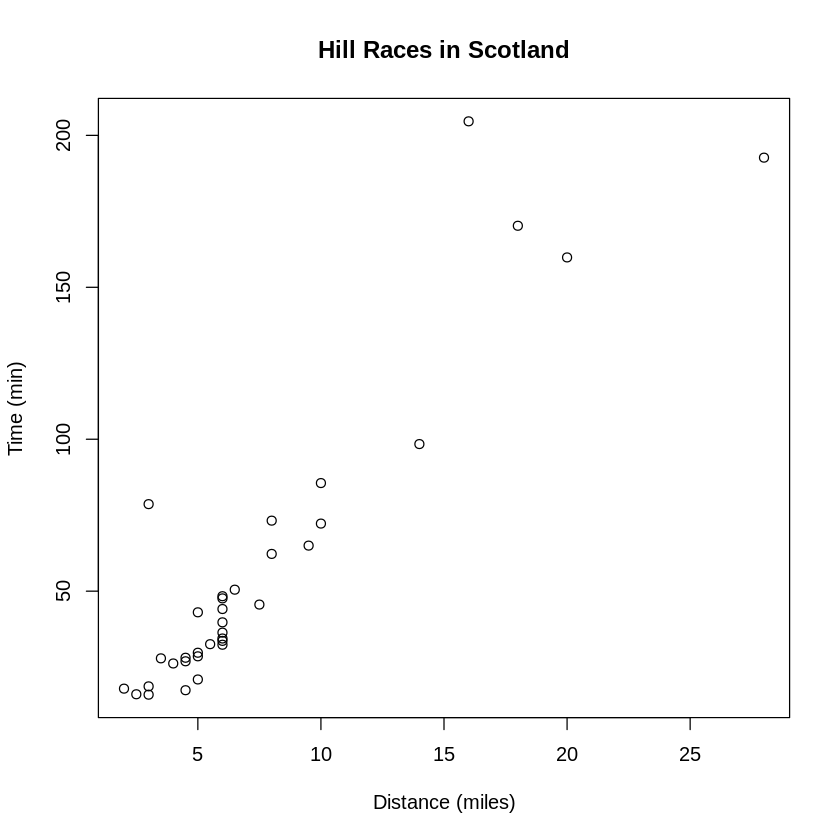

In [ ]:
plot(hills$dist,hills$time,xlab="Distance (miles)",ylab="Time (min)",main="Hill Races in Scotland")

b) A linear regression model (without intercept term) fitted to this data gives the following estimated regression equation

$\hat{time}_{i} = 7.908 \cdot dist_{i}$

Add the regression line to the plot

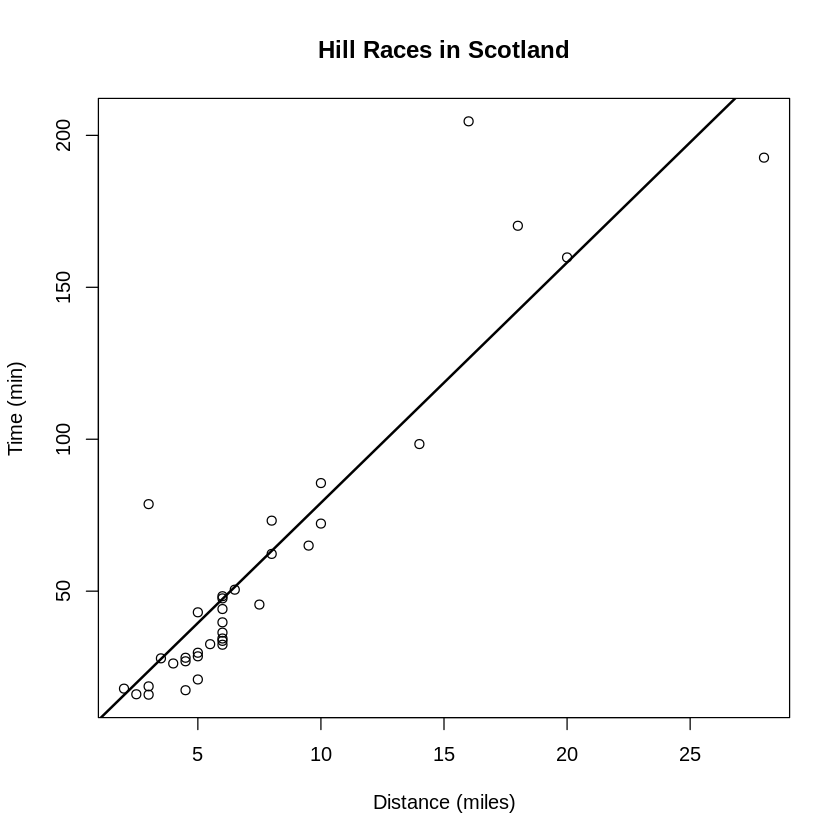

In [ ]:
plot(hills$dist,hills$time,xlab="Distance (miles)",ylab="Time (min)",main="Hill Races in Scotland")
abline(0,7.908,lwd=2)

c) a 95% confidence interval for the expected (average) time given dist is

$\left(7.1728 \cdot dist, 8.6437 \cdot dist \right)$

Shade the confidence interval in colour

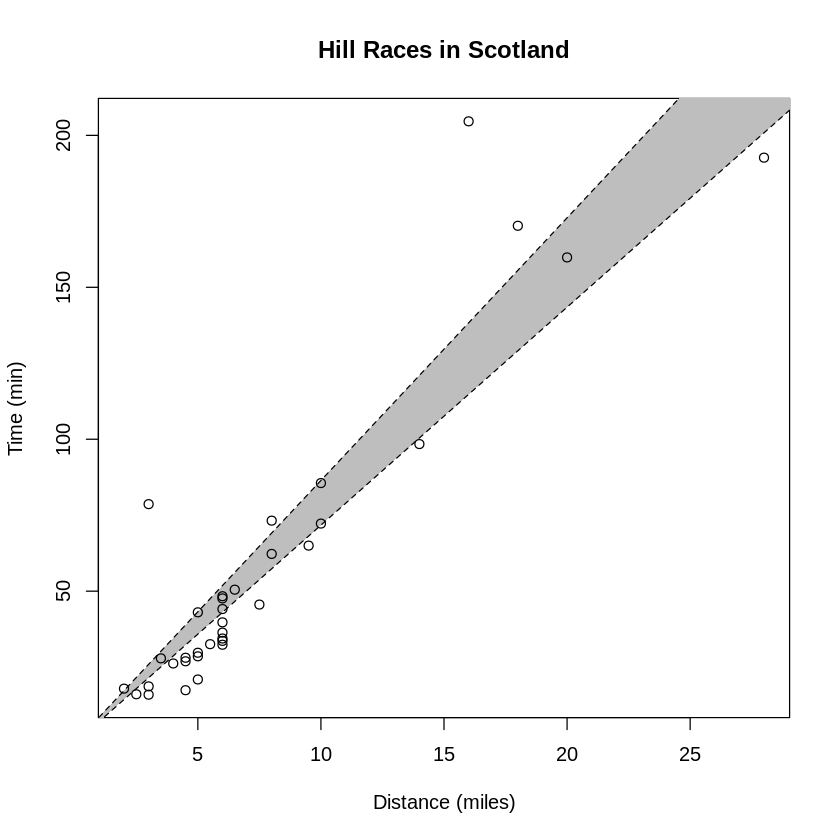

In [ ]:
plot(hills$dist,hills$time,xlab="Distance (miles)",ylab="Time (min)",main="Hill Races in Scotland",type = "n")
triangle <- rbind(c(0,0),c(30, 7.1728*30),c(30, 8.6437*30))
polygon(triangle,lty=2,col="grey")
points(hills$dist,hills$time)

d) A 95% prediction interval for time given dist is

$\left(7.908 \cdot dist  - 0.7355 \cdot \sqrt{3021.25 + dist^{2}}, 7.908 \cdot dist  + 0.7355 \cdot \sqrt{3021.25 + dist^{2}} \right)$

Draw the upper and lower bound of the prediction interval in dashed lines

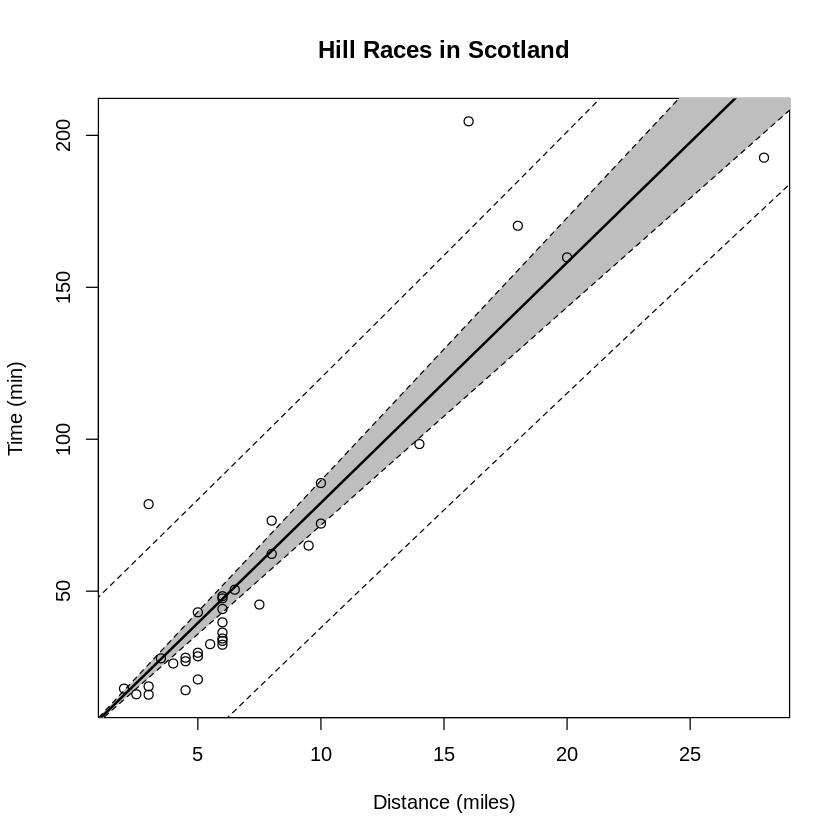

In [ ]:
plot(hills$dist,hills$time,xlab="Distance (miles)",ylab="Time (min)",main="Hill Races in Scotland",type="n")
triangle <- rbind(c(0,0),c(30, 7.1728*30),c(30, 8.6437*30))
polygon(triangle,lty=2,col="grey")
points(hills$dist,hills$time)

abline(0,7.908,lwd=2)

dist0 <- seq(0,30,length.out=300)
lower <- 7.908*dist0 - 0.7355*sqrt(3021.25+dist0^2)
upper <- 7.908*dist0 + 0.7355*sqrt(3021.25+dist0^2)
lines(dist0,lower,lty=2)
lines(dist0,upper,lty=2)

